## Load data and do cleaning

In [4]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import copy

# File to Load (Remember to Change These)
file_to_load = "Resources/final_df.csv"

# Read File and store into Pandas data frame, dropna
final_pre = pd.read_csv(file_to_load)
final_drop = final_pre.drop('Earnings Date',axis=1).drop('1y Target Est',axis = 1).dropna()
final_drop.head()
list(final_drop)

['Stock Ticker',
 'Previous Close',
 'Open',
 'Bid',
 'Ask',
 "Day's Range",
 '52 Week Range',
 'Volume',
 'Avg. Volume',
 'Market Cap',
 'Beta (3Y Monthly)',
 'PE Ratio (TTM)',
 'EPS (TTM)',
 'Forward Dividend',
 'Forward Yeild',
 'Ex-Dividend Date']

In [5]:
# Create column "Dividend yield"
final_drop['Dividend_yield'] = final_drop['Forward Dividend']/final_drop['EPS (TTM)']
data =final_drop
data.count()
data
data.to_csv("data2019.csv", index=True, header=True)

## Machine learning K-means clustering

* Using K-Means Algorithm in clustering stocks from S&P500


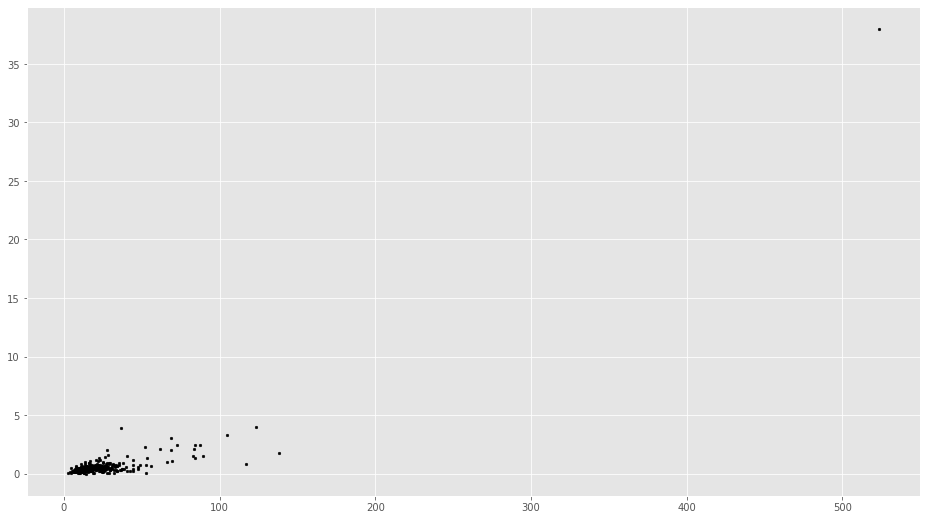

In [266]:
# Getting the PE ratios and Dividend yield values and plotting it
f1 = data['PE Ratio (TTM)'].values
f2 = data['Dividend_yield'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)


* There's one obvious outlier so we want to get rid of it


In [267]:
data['Dividend_yield'].max()
data_final=data[data.Dividend_yield != 38.0]
data_final.count()

Stock Ticker         305
Previous Close       305
Open                 305
Bid                  305
Ask                  305
Day's Range          305
52 Week Range        305
Volume               305
Avg. Volume          305
Market Cap           305
Beta (3Y Monthly)    305
PE Ratio (TTM)       305
EPS (TTM)            305
Forward Dividend     305
Forward Yeild        305
Ex-Dividend Date     305
Dividend_yield       305
dtype: int64

Text(0, 0.5, 'Dividend yield')

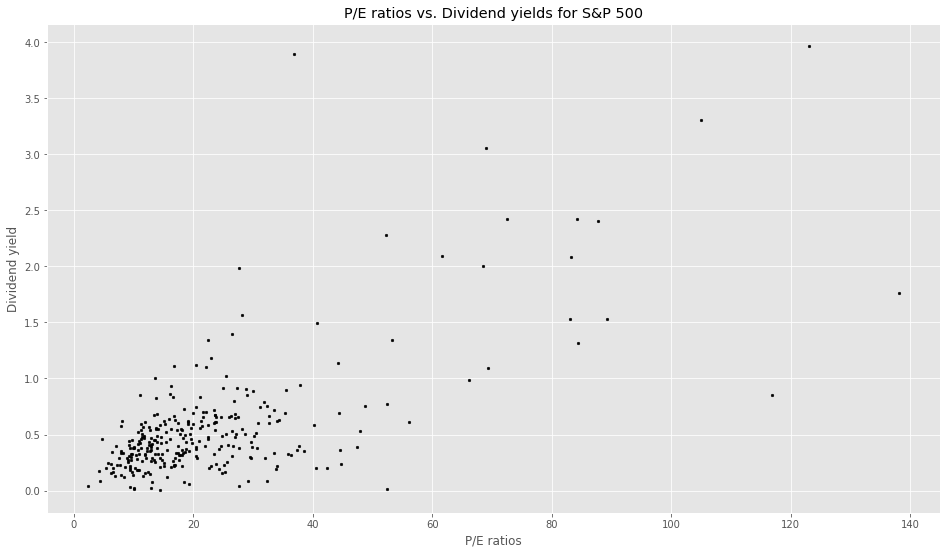

In [268]:
# Replot the data
f1 = data_final['PE Ratio (TTM)'].values
f2 = data_final['Dividend_yield'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.title('P/E ratios vs. Dividend yields for S&P 500')
plt.xlabel('P/E ratios')
plt.ylabel('Dividend yield')

In [269]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [270]:
# Number of clusters
k = 5
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-133, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 6.  2.]
 [36.  4.]
 [70.  4.]
 [82.  1.]
 [83.  0.]]


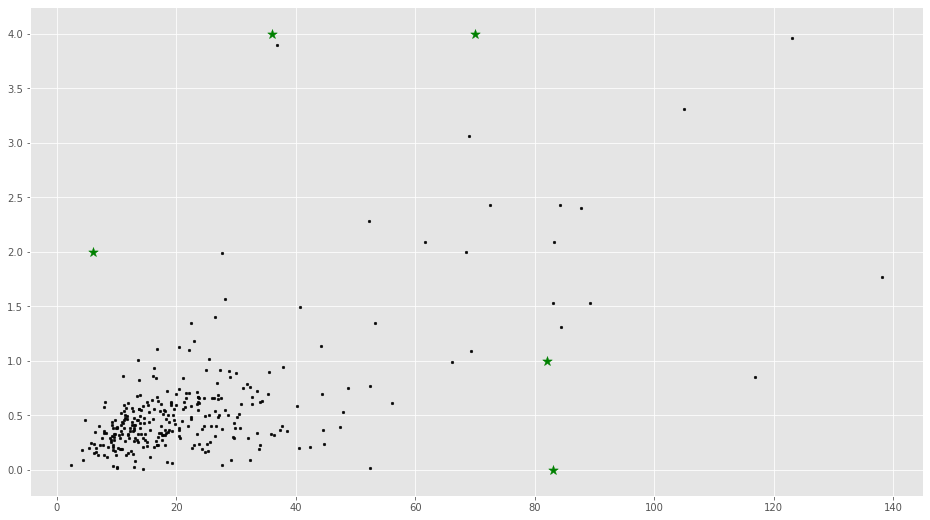

In [271]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=100, c='g')

In [272]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = copy.deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

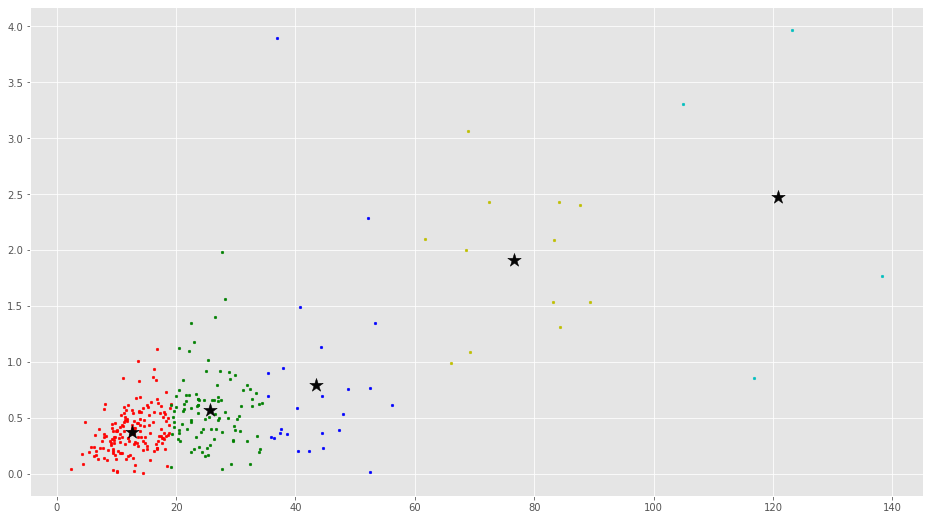

In [273]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [274]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(f1,5)
# assign each sample to a cluster
idx,_ = vq(f1,centroids)

In [275]:
details = [(PE,cluster) for PE, cluster in zip(f1,idx)]
selected = []
detailDict = {}
for detail in details:
    if detail[1]==0:
        selected.append(detail)
print(selected)


[(69.31, 0), (68.51, 0), (72.44, 0), (116.9, 0), (123.13, 0), (68.97, 0), (89.33, 0), (104.98, 0), (83.09, 0), (66.11, 0), (84.23, 0), (84.37, 0), (83.27, 0), (138.2, 0), (87.73, 0)]


In [276]:
selected_df = pd.DataFrame(selected)
# selected_df

In [277]:
selected_df.rename(columns={0:'PE Ratio (TTM)',
                            1:'Cluster'},inplace =True)
selected_df
C0= pd.merge(selected_df, data, on='PE Ratio (TTM)', how='inner')
C0_df=C0.loc[:,'PE Ratio (TTM)':'Stock Ticker']
C0_df

,PE Ratio (TTM),Cluster,Stock Ticker
0,69.31,0,AMT
1,68.51,0,CPB
2,72.44,0,CCI
3,116.90,0,XRAY
4,123.13,0,DLR
5,68.97,0,D
6,89.33,0,FDX
7,104.98,0,FE
8,83.09,0,MGM
9,66.11,0,MCHP


In [278]:
C0_df.to_csv("Cluster0.csv", index=True, header=True)